In [37]:
import timeit
from matplotlib import pyplot as plt
import seaborn as sns
import random
from utils import generar_objetos

from empaquetar_aprox import empaquetar_aprox
from empaquetar_aprox_2 import empaquetar_aprox_2
from empaquetar_bt import empaquetar_bt

random.seed(42)

sns.set(rc={'figure.facecolor':'white'})

CASES = 15
N_DATASETS = 5

CASES_APROX = 50

In [31]:
def get_time(empaquetar, datasets):
    total_time = 0
    
    for objetos in datasets:
        number_of_executions, time = timeit.Timer(lambda: empaquetar(objetos)).autorange()
        total_time += time / number_of_executions

    return total_time / len(datasets)


def plot(empaquetar, label, cases):
    time_to_run = [get_time(empaquetar, case) for case in cases]
    plt.plot([i+1 for i in range(len(cases))], time_to_run, label=label)
    return plt


def plot_comparison(cases, title, xlabel):
    plot(empaquetar_bt, 'Backtracking', cases)
    plot(empaquetar_aprox, 'Algoritmo aproximado', cases)
    plot(empaquetar_aprox_2, 'Algoritmo aproximado 2', cases)
    plt.xlabel(xlabel)
    plt.ylabel("Tiempo de ejecucion (s)")
    plt.title(title)
    plt.legend()
    plt.show()

def plot_comparison_aprox_only(cases, title, xlabel):
    plot(empaquetar_aprox, 'Algoritmo aproximado', cases)
    plot(empaquetar_aprox_2, 'Algoritmo aproximado 2', cases)
    plt.xlabel(xlabel)
    plt.ylabel("Tiempo de ejecucion (s)")
    plt.title(title)
    plt.legend()
    plt.show()

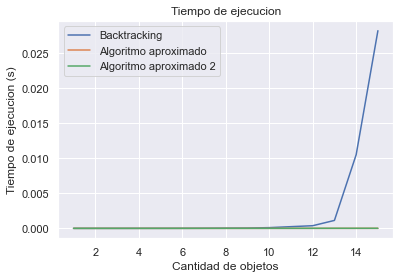

In [25]:
cases = [[generar_objetos(i) for _ in range(N_DATASETS)] for i in range(CASES)]
plot_comparison(cases, "Tiempo de ejecucion" ,"Cantidad de objetos")

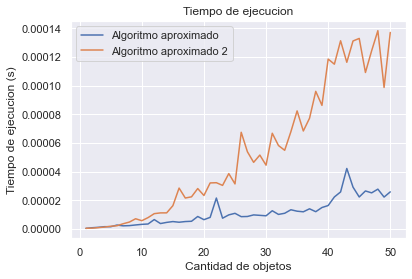

In [38]:
cases_aprox_only = [[generar_objetos(i)] for i in range(CASES_APROX)]

plot_comparison_aprox_only(cases_aprox_only, "Tiempo de ejecucion" ,"Cantidad de objetos")